In [1]:
#importing libraries 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mlp
import pandas as pd 
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


### Understanding The Data

In [2]:
#reading the file  and printing first 5 lines 
df = pd.read_csv("data.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#getting the shape of the data set 
df.shape
#3333 rows and 21 columns 

(3333, 21)

In [4]:
# df information
df.info()

#no missing data/ nul values in the data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
#checking null values 
df.isnull().sum()# there is no null values in the dataset 

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
#convert area code to a sring 
df["area code"]=df["area code"].astype(object)

Text(0.5, 1.0, 'Relationship Between Account Length and Service Calls')

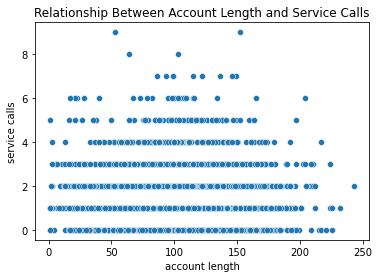

In [7]:
#Relationship Between Account Length and Service Calls
sns.scatterplot(x=df["account length"],y=df["customer service calls"])

#adding labels 
plt.xlabel('account length')
plt.ylabel('service calls')
plt.title("Relationship Between Account Length and Service Calls")

#there is no relationship between account length and  customer service calls 

In [8]:
# dropping columns , dropping account length  since it has no major significance and phone number as every indivudual will have a eunique identify 
df1= df.drop(["phone number","account length"],axis=1)
df1

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [9]:
# statistical overview of the data 
df1.describe()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


85.5085508550855


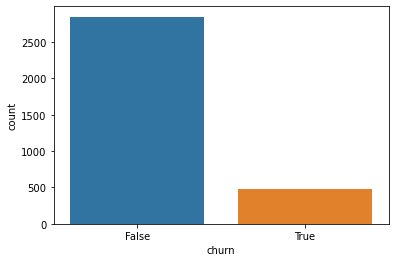

In [10]:
# getting  distribution of subscribers'churn'
churn_1= (sum (df['churn']==True),sum (df["churn"]==False ))
#plotting graph
plot=sns.countplot(x="churn",data=df)
#getting percentage of loyal customers 
un_loyal_customers =(churn_1[1]/sum(churn_1))*100
print(un_loyal_customers)

#85% of the subscribers are not loyal customers        

In [11]:
#getting churn value count 
df["churn"].value_counts()
#2850 respondents are not loyal customers 

False    2850
True      483
Name: churn, dtype: int64

In [12]:
#getting the value counts of international plan
international_plan_count =df["international plan"].value_counts()
international_plan_count

#plot=sns.countplot(x="churn",data=df)

no     3010
yes     323
Name: international plan, dtype: int64

In [13]:
# getting the value counts of voice mail plan
voice_plan_count=df["voice mail plan"].value_counts()
voice_plan_count

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [14]:
df1.groupby(by=["international plan","voice mail plan"])["churn"].count()

international plan  voice mail plan
no                  no                 2180
                    yes                 830
yes                 no                  231
                    yes                  92
Name: churn, dtype: int64

### Transforming Categorical Variable with One-Hot Encoding 
#### converting  categorical columns into numerical format that can be used in machine learning models 


In [15]:
# make a copy of df1 
df1_copy = df1.copy()
df1_copy

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [16]:
#converting categorical columns to numeric using onehot encoding 
df1_copy=pd.get_dummies(df1_copy,columns=["international plan","voice mail plan","churn"],dtype=int,drop_first=True)
df1_copy.head()


,state,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_yes,voice mail plan_yes,churn_True
0,KS,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,OH,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,NJ,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,OH,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
4,OK,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0


### Multiple regression with one hot encoded variable 

In [17]:
df1_copy.corr()['international plan_yes'].sort_values (ascending = False)

international plan_yes    1.000000
churn_True                0.259852
total day charge          0.049398
total day minutes         0.049396
total intl minutes        0.045871
total intl charge         0.045780
total eve charge          0.019106
total eve minutes         0.019100
total intl calls          0.017366
total night calls         0.012451
number vmail messages     0.008745
total eve calls           0.006114
voice mail plan_yes       0.006006
total day calls           0.003755
customer service calls   -0.024522
total night minutes      -0.028905
total night charge       -0.028913
Name: international plan_yes, dtype: float64

In [18]:
df1_copy.corr()['voice mail plan_yes'].sort_values (ascending = False)

voice mail plan_yes       1.000000
number vmail messages     0.956927
total eve charge          0.021559
total eve minutes         0.021545
total night calls         0.015553
total intl calls          0.007618
total night minutes       0.006079
total night charge        0.006064
international plan_yes    0.006006
total intl charge        -0.001276
total intl minutes       -0.001318
total day minutes        -0.001684
total day charge         -0.001686
total eve calls          -0.006444
total day calls          -0.011086
customer service calls   -0.017824
churn_True               -0.102148
Name: voice mail plan_yes, dtype: float64

In [19]:
df1_copy.corr()['churn_True'].sort_values# (ascending = False)

<bound method Series.sort_values of number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
international plan_yes    0.259852
voice mail plan_yes      -0.102148
churn_True                1.000000
Name: churn_True, dtype: float64>

In [20]:
# multiple Regression with one hot encoded variable 
y = df1_copy[['churn_True']]
#X= df1_copy.drop(columns=['number vmail messages'],inplace= True)
X=df1_copy[['international plan_yes','voice mail plan_yes']]

### Modeling

#### Checking how the presence of voicemail and international plan relate to customer loyalty 

In [21]:
# ols Model
ols_model=sm.OLS(y,sm.add_constant(X))
ols_results=ols_model.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             churn_True   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     141.4
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           1.14e-59
Time:                        22:28:31   Log-Likelihood:                -1113.6
No. Observations:                3333   AIC:                             2233.
Df Residuals:                    3330   BIC:                             2251.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1375      0.007     19.245      0.000       0.123       0.151
international plan_yes     0.3099      0.020     15.656      0.000       0.271       0.349
voice mail plan_yes       -0.0816      0.013     -6.234      0.000      -0.107      -0.056
==============================================================================
Omnibus:                     1073.480   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2542.380
Skew:                           1.847   Prob(JB):                         0.00
Kurtosis:                       5.158   Cond. No.                         3.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## CROSS VALIDATION   OF THE MODEL 
#### This involves spliting the data into train and test data 


In [22]:
#imporing liblraries 
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [23]:
#split the data into train and test sets
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42)
# fit the model
logreg= LogisticRegression(fit_intercept= False,C=1e12, solver= 'liblinear')
logreg.fit(X_train,y_train)
print(logreg)
#predict
y_hat_test= logreg.predict(X_test)

print(X_train,X_test,y_train,y_test)

# print("")
# df1_copy.head()

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')
      international plan_yes  voice mail plan_yes
367                        0                    0
3103                       0                    0
549                        0                    1
2531                       0                    0
2378                       0                    0
...                      ...                  ...
1095                       0                    0
1130                       0                    0
1294                       0                    0
860                        0                    0
3174                       0                    1

[2499 rows x 2 columns]       international plan_yes  voice mail plan_yes
438                        0                    0
2674                       0                    0
1345                       0                    0
1957                       0                    0
2148                       0                  

C:\Users\Carol\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [24]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(random_state=42)

clf.fit(X_train,y_train)
#make predictions 
y_pred=clf.predict(X_test)
#Evaluate the model
print("accurcy:",(clf.fit(X_train,y_train)))


accurcy: DecisionTreeClassifier(random_state=42)


### Interpretation of the data 
#### International plan_yes has a coefficient of 0.3, meaning if the international plans increases, there is a possiblity of increase in customer loyalty(churn ) by 0.3 
#### However,voice mail plan_yes has a coefficient of -0.0816, meaning if the voice mail plan_yes increases, there is a possiblity of decrease in customer loyalty(churn ) by -0.0816

#### The P_Value is less than 0.5 implying the the  variables are statistically signinficant 
#### R-squered value is 0.078 indicating the indipendent variables doesnt explain well the variation in dependent variable 
#### When all the independents values are ar zero, the dependent variable is at 0.1375

### Conclusion and recommendations

#### The researcher would advise XYZ company to run  market campaign to recruit more customers on international plan option as this would improve profitability and market share .

#### Voice mail plan was statistically significant as the p_value for the two independent variables was  zero,hence the researcher advises company XYZ to relook on the voice mail plan,and understand the pain points that would decline customer loyalty 


